#  Train and test your CNN having a pre-trained MobileNet as backbone to classify images of the CIFAR-10 dataset. Discuss your results by comparing performance between transfer_learning + fine tuning and only transfer learning

###  Import Necessary Modules

In [7]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import  Flatten, Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

### Load CIFAR-10 dataset

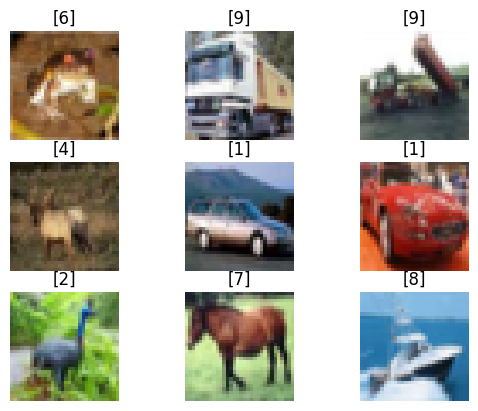

In [14]:
# Function to Display Loaded Data

def display_image(image_set, title_set):
    n = len(title_set)

    for i in range(n):
        plt.subplot(3, 3, i + 1)
        plt.imshow(image_set[i], cmap='gray')
        plt.title(title_set[i])
        plt.axis('off')
    plt.show()
    plt.close()

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Display some loaded data
display_image(x_train[:9], y_train[:9])

# Prepare Dataset
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

###  Build a CNN Classifier Based on a Pre-trained MobileNet Model

### Transfer Learning Only

In [9]:
# Load MobileNet model with pre-trained weights
mobilenet_model = MobileNet(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze all layers in the pre-trained model
for layer in mobilenet_model.layers:
    layer.trainable = False

# Build a new model based on pre-trained MobileNet
inputs = mobilenet_model.inputs
x = mobilenet_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
outputs = Dense(10, activation='softmax')(x)

new_model_transfer_learned = Model(inputs, outputs, name='NewMobileNetModel')

new_model_transfer_learned.summary()

C:\Users\Israk\AppData\Local\Temp\ipykernel_20172\655538341.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet_model = MobileNet(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


Model: "NewMobileNetModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 16, 16, 32)     │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 16, 16, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 16, 16, 32)     │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 16, 16, 64)     │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 8, 8, 64)       │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 8, 8, 128)      │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 8, 8, 128)      │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 8, 8, 128)      │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,890,634 (14.84 MB)

 Trainable params: 660,234 (2.52 MB)

 Non-trainable params: 3,230,400 (12.32 MB)

### Training and Evaluation MobileNet Based CNN by the CIFAR-10 Dataset With Only Transfer Learning

Epoch 1/10


c:\Users\Israk\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_93']
Received: inputs=Tensor(shape=(None, 32, 32, 3))
  warnings.warn(msg)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.1627 - loss: 2.3806 - val_accuracy: 0.1873 - val_loss: 2.1885
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.1866 - loss: 2.1950 - val_accuracy: 0.1955 - val_loss: 2.1618
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.1947 - loss: 2.1752 - val_accuracy: 0.1974 - val_loss: 2.1631
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.1970 - loss: 2.1693 - val_accuracy: 0.1993 - val_loss: 2.1505
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.1952 - loss: 2.1630 - val_accuracy: 0.2057 - val_loss: 2.1439
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.1977 - loss: 2.1616 - val_accuracy: 0.2043 - val_loss: 2.1461
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.2017 - loss: 2.1513 - val_accuracy: 0.1986 - val_loss: 2.1434
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.2020 - loss: 2.14

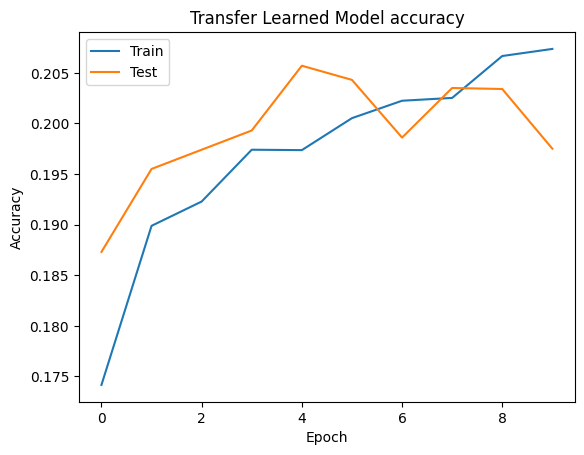

In [10]:
new_model_transfer_learned.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_transfer_learned = new_model_transfer_learned.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
transfer_learned_test_loss, transfer_learned_test_accuracy = new_model_transfer_learned.evaluate(x_test, y_test)

print(f"Test Loss: {transfer_learned_test_loss:.4f}, Test Accuracy: {transfer_learned_test_accuracy:.4f}")

# Plot training & validation accuracy values
plt.plot(history_transfer_learned.history['accuracy'])
plt.plot(history_transfer_learned.history['val_accuracy'])
plt.title('Transfer Learned Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.close()

### Transfer Learning and Fine Tuning

In [11]:
# Load MobileNet model with pre-trained weights
mobilenet_model = MobileNet(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze last 20 layers in the pre-trained model
for layer in mobilenet_model.layers[-20:]:
    layer.trainable = False

# Build a new model based on pre-trained MobileNet
inputs = mobilenet_model.inputs
x = mobilenet_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
outputs = Dense(10, activation='softmax')(x)

new_model_transfer_learned_fine_tuned = Model(inputs, outputs, name='NewMobileNetModel')

new_model_transfer_learned_fine_tuned.summary()

C:\Users\Israk\AppData\Local\Temp\ipykernel_20172\1603902237.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet_model = MobileNet(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


Model: "NewMobileNetModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 16, 16, 32)     │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 16, 16, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 16, 16, 32)     │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 16, 16, 64)     │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 8, 8, 64)       │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 8, 8, 128)      │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 8, 8, 128)      │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 8, 8, 128)      │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,890,634 (14.84 MB)

 Trainable params: 2,004,554 (7.65 MB)

 Non-trainable params: 1,886,080 (7.19 MB)

### Training and Evaluation MobileNet Based CNN by the CIFAR-10 Dataset With Transfer Learning and Fine Tuning

Epoch 1/10


c:\Users\Israk\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_186']
Received: inputs=Tensor(shape=(None, 32, 32, 3))
  warnings.warn(msg)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 92s 54ms/step - accuracy: 0.4829 - loss: 1.4873 - val_accuracy: 0.7082 - val_loss: 0.8810
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.7389 - loss: 0.7935 - val_accuracy: 0.7658 - val_loss: 0.7187
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.7855 - loss: 0.6668 - val_accuracy: 0.7725 - val_loss: 0.6899
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.8093 - loss: 0.5843 - val_accuracy: 0.7999 - val_loss: 0.6051
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 53ms/step - accuracy: 0.8388 - loss: 0.4977 - val_accuracy: 0.7759 - val_loss: 0.6863
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 54ms/step - accuracy: 0.8587 - loss: 0.4320 - val_accuracy: 0.7984 - val_loss: 0.6348
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 54ms/step - accuracy: 0.8760 - loss: 0.3766 - val_accuracy: 0.8006 - val_loss: 0.6496
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 54ms/step - accuracy: 0.8932 - loss: 0.33

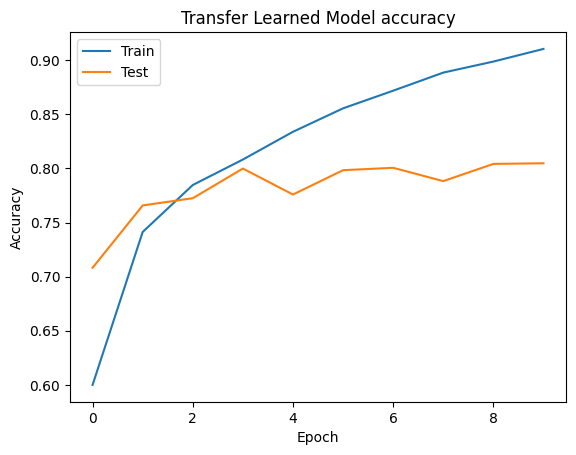

In [12]:
new_model_transfer_learned_fine_tuned.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_transfer_learned_fine_tuned = new_model_transfer_learned_fine_tuned.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
transfer_learned_fine_tuned_test_loss, transfer_learned_fine_tuned_test_accuracy = new_model_transfer_learned_fine_tuned.evaluate(x_test, y_test)

print(f"Test Loss: {transfer_learned_fine_tuned_test_loss:.4f}, Test Accuracy: {transfer_learned_fine_tuned_test_accuracy:.4f}")

# Plot training & validation accuracy values
plt.plot(history_transfer_learned_fine_tuned.history['accuracy'])
plt.plot(history_transfer_learned_fine_tuned.history['val_accuracy'])
plt.title('Transfer Learned Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.close()

### Performance Comparison Between MobileNet based CNN on CIFAR-10 Dataset in Only Transfer Learning and both Transfer Learning and Fine Tuning

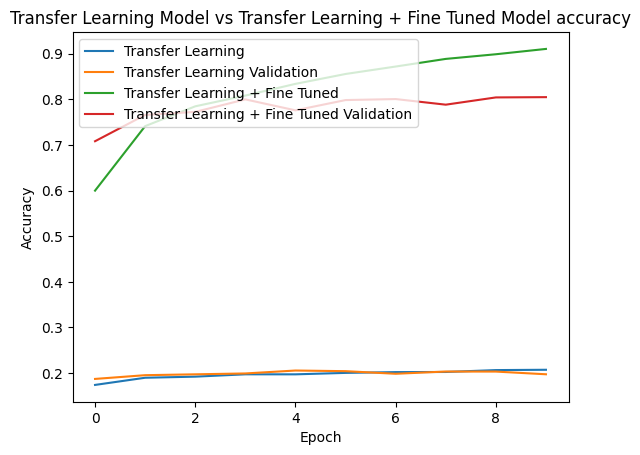

In [13]:
# Plot both Transfer Learning Model and Transfer Learning Fine Tuned Model's accuracy

plt.plot(history_transfer_learned.history['accuracy'], label='Transfer Learning')
plt.plot(history_transfer_learned.history['val_accuracy'], label='Transfer Learning Validation')
plt.plot(history_transfer_learned_fine_tuned.history['accuracy'], label='Transfer Learning + Fine Tuned')
plt.plot(history_transfer_learned_fine_tuned.history['val_accuracy'], label='Transfer Learning + Fine Tuned Validation')
plt.title('Transfer Learning Model vs Transfer Learning + Fine Tuned Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()
plt.close()